<a href="https://colab.research.google.com/github/DattaIn/idatta.github.io/blob/master/Credit_risk_modelling_Logistic_Regression_Amit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://bigml.com/user/jbosca/gallery/dataset/5a7def3d2a83476e09000456#info) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

### Download the dataset

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Import Neccesary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [ ]:
# YOUR CODE HERE
df = pd.read_csv("https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv")
df.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


#### Describe the all statistical properties of the train dataset

In [ ]:
# YOUR CODE HERE
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Pre-processing (1 point)

#### Remove unwanted columns

In [ ]:
# YOUR CODE HERE
print(df.shape)
df.drop(df.columns[df.columns.str.contains('Unnamed',case =False)],axis =1, inplace=True)
#remove the cols with 50% empty values
print(df.count())
df.dropna(thresh=len(df)/2,axis=1,inplace=True)
df.shape

(150000, 12)
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
dtype: int64


(150000, 11)

In [ ]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [ ]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
# YOUR CODE HERE
print(df.isna().sum())
#calcumate the mean  dependents as per age and replace it in null values of dependent.
df1 = df[['age','NumberOfDependents']].groupby('age',axis = 0)['NumberOfDependents'].mean().reset_index(name='meanDependentPerAge')
df2 = df.merge(df1,on='age',how="left")
df2['meanDependentPerAge'] = df2['meanDependentPerAge'].values.round()
df2['NumberOfDependents']= df2['NumberOfDependents'].fillna(df2.meanDependentPerAge)
df2.drop(columns=['meanDependentPerAge'],axis=1,inplace=True)

df2.dropna(axis=0,inplace=True)
df2.drop(df2[df2['age'] == 0].index, inplace= True)
print("#################################")
print("######After cleaning dataframe as df2 ########")
print("#################################")
print(df2.shape)
df2.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64
#################################
######After cleaning dataframe as df2 ########
#################################
(120268, 11)


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

In [ ]:
df2['SeriousDlqin2yrs'].unique()

array([1, 0])

In [ ]:
s

0    93.05141
1     6.94859
Name: SeriousDlqin2yrs, dtype: float64

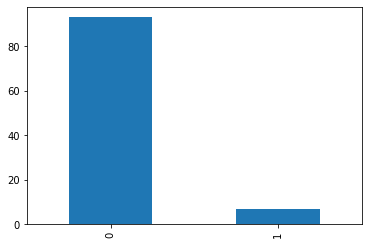

In [ ]:
# YOUR CODE HERE
s = df2['SeriousDlqin2yrs'].value_counts(normalize=True) * 100
# df_percent = pd.DataFrame([s],columns=['SeriousDlqin2yrs','percent'])
# y = df_percent["SeriousDlqin2yrs"]
# x = df_percent["percent"]
# sns.barplot(data=df_percent)
# plt.xticks(rotation= 90)
s.plot(kind='bar')
plt.show()

#### Plot the distribution of SeriousDlqin2yrs by age

   SeriousDlqin2yrs  age   Percent
0                 0   49  2.630638
1                 0   48  2.604725
2                 0   47  2.574344
3                 0   50  2.560941
4                 0   46  2.543070


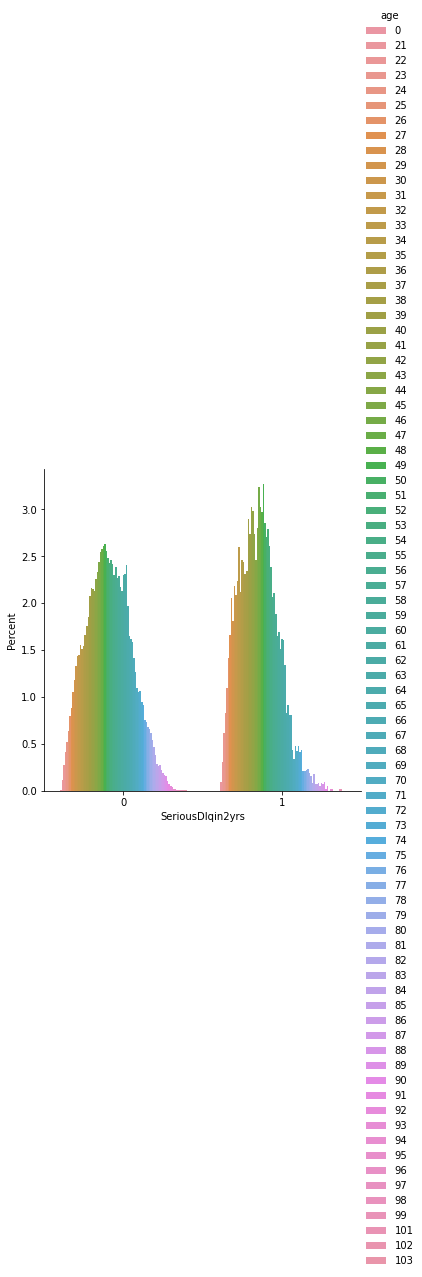

In [ ]:
# YOUR CODE HERE
new_df = df2.groupby('SeriousDlqin2yrs')['age'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
print(new_df.head())
sns.catplot(x='SeriousDlqin2yrs', y='Percent', hue='age', kind='bar', data=new_df)
plt.show()

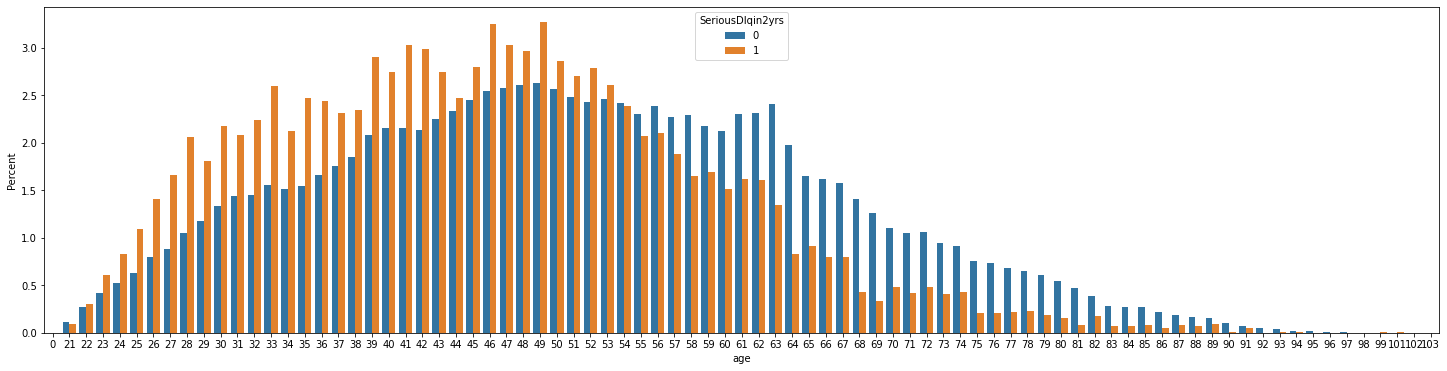

In [ ]:
fig = plt.figure(figsize=(25,6))
sns.barplot(x='age', y='Percent', hue='SeriousDlqin2yrs', data=new_df)
plt.show()

#### Calculate the correlation and plot the heatmap

In [ ]:
corrMatrix = df2.corr()
corrMatrix.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.002386,-0.102685,0.123159,-0.003291,-0.019746,-0.027445,0.111149,-0.003005,0.093836,0.046704
RevolvingUtilizationOfUnsecuredLines,-0.002386,1.000000,-0.005476,-0.001194,-0.000243,0.007124,-0.010880,-0.000931,0.005895,-0.000955,0.002347
age,-0.102685,-0.005476,1.000000,-0.049177,-0.001260,0.037717,0.187112,-0.047889,0.065110,-0.043501,-0.206397
NumberOfTime30-59DaysPastDueNotWorse,0.123159,-0.001194,-0.049177,1.000000,-0.001981,-0.010217,-0.043868,0.975259,-0.024036,0.980131,0.003538
DebtRatio,-0.003291,-0.000243,-0.001260,-0.001981,1.000000,-0.028712,0.008685,-0.002703,0.019574,-0.001801,0.009803


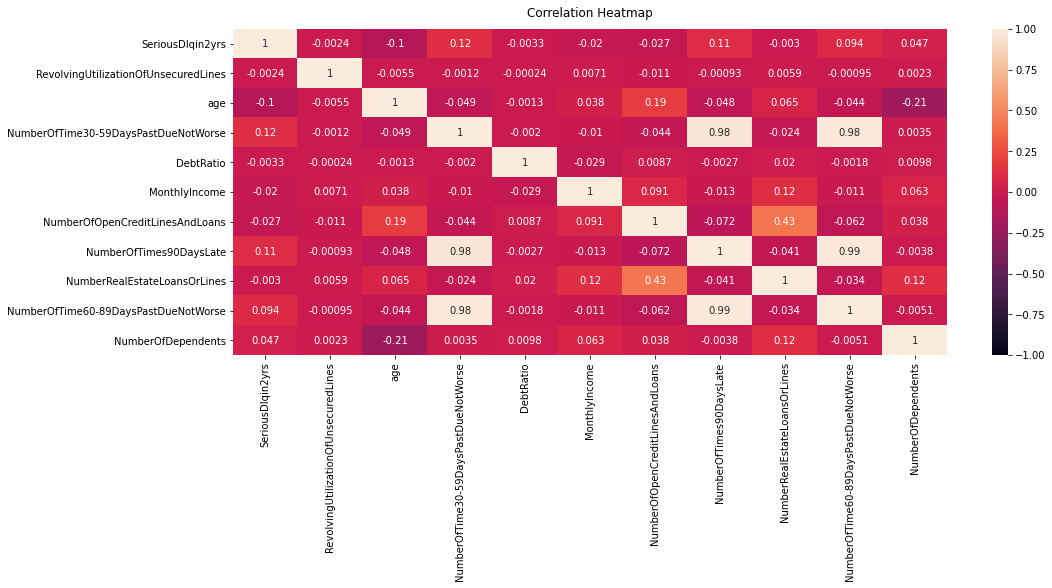

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Data Engineering (2 points)

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [ ]:
# YOUR CODE HERE
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
y = df2['SeriousDlqin2yrs'].to_numpy()
X = df2.loc[:, df2.columns != 'SeriousDlqin2yrs']


In [ ]:
from xverse.transformer import WOE
clf = WOE()
clf.fit(X, y)
print(clf.woe_df.head())
print(clf.iv_df) #information value dataset
X1 = clf.transform(X)
X1.head()

   Variable_Name          Category  ...       WOE  Information_Value
0      DebtRatio   (-0.001, 0.197]  ... -0.145656           0.053027
1      DebtRatio    (0.197, 0.408]  ... -0.214224           0.053027
2      DebtRatio  (0.408, 61106.5]  ...  0.292769           0.053027
3  MonthlyIncome  (-0.001, 4000.0]  ...  0.278007           0.071504
4  MonthlyIncome  (4000.0, 7080.0]  ...  0.011744           0.071504

[5 rows x 11 columns]
                          Variable_Name  Information_Value
8  RevolvingUtilizationOfUnsecuredLines           0.851488
4  NumberOfTime30-59DaysPastDueNotWorse           0.458650
6               NumberOfTimes90DaysLate           0.449550
5  NumberOfTime60-89DaysPastDueNotWorse           0.244553
9                                   age           0.168243
1                         MonthlyIncome           0.071504
0                             DebtRatio           0.053027
3       NumberOfOpenCreditLinesAndLoans           0.023775
2                    NumberOfDep

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.888391,0.055414,1.843206,0.292769,-0.386236,-0.041712,-0.16513,-0.067619,-0.091675,0.242644
1,0.888391,0.362498,-0.258248,-0.145656,0.278007,0.173560,-0.16513,0.026777,-0.091675,-0.095097
2,0.888391,0.362498,-0.258248,-0.145656,0.278007,0.173560,-0.16513,0.026777,-0.091675,-0.095097
3,-0.714891,0.362498,-0.258248,-0.145656,0.278007,0.173560,-0.16513,0.026777,-0.091675,-0.095097
4,0.888391,0.055414,-0.258248,-0.145656,-0.386236,-0.194272,-0.16513,0.026777,-0.091675,-0.095097


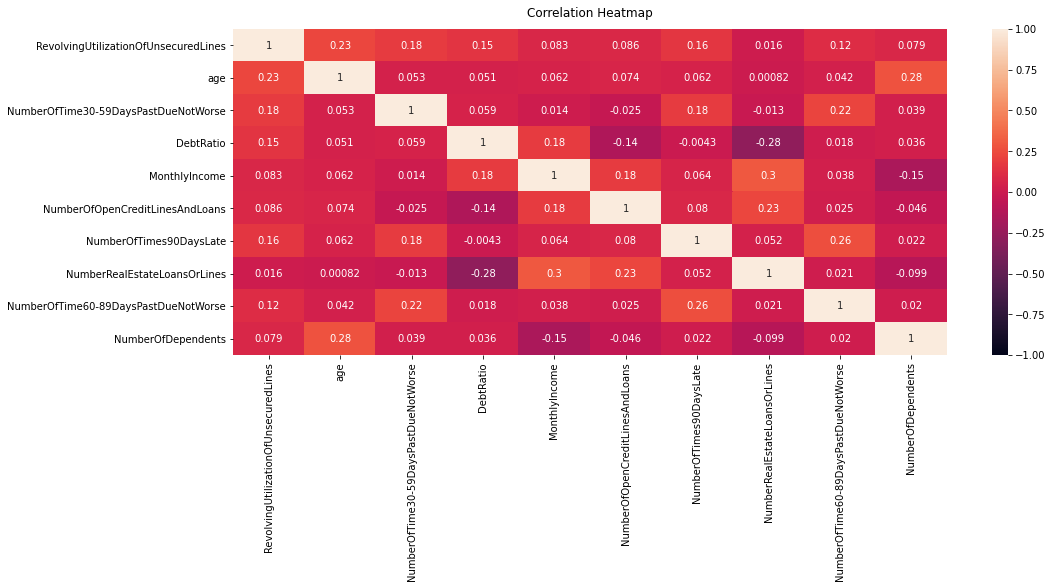

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X1.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Identify features,  target and split it into train and test

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 0)

### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](
https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7)

Start training
[Training step #0] — Cost function: 0.6931
[Training step #1] — Cost function: 0.6931
[Training step #2] — Cost function: 0.6931
[Training step #3] — Cost function: 0.6931
[Training step #4] — Cost function: 0.6931
[Training step #5] — Cost function: 0.6931
[Training step #6] — Cost function: 0.6931
[Training step #7] — Cost function: 0.6931
[Training step #8] — Cost function: 0.6931
[Training step #9] — Cost function: 0.6931
[Training step #10] — Cost function: 0.6931
[Training step #11] — Cost function: 0.6931
[Training step #12] — Cost function: 0.6931
[Training step #13] — Cost function: 0.6931
[Training step #14] — Cost function: 0.6930
[Training step #15] — Cost function: 0.6930
[Training step #16] — Cost function: 0.6930
Accuracy on the training set: 0.6975643285551157
Accuracy on the test set: 0.6963216708793402


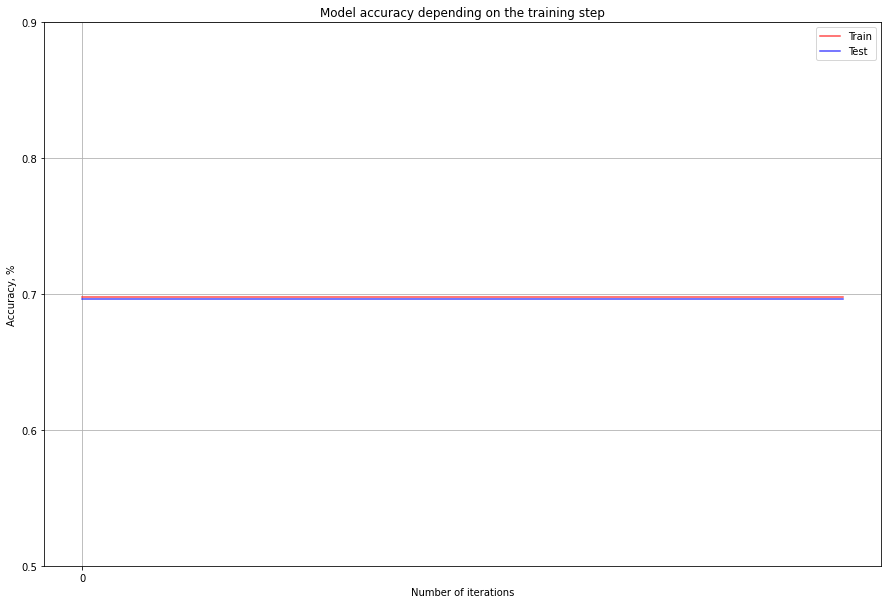

In [ ]:
# YOUR CODE HERE
def sigmoid(x):
  return np.maximum(np.minimum(1 / (1 + np.exp(-x)), 0.9999), 0.0001)

def cost_function(x, y, theta):
  t = x.dot(theta)
  return  (-1)*np.sum(y * np.log(sigmoid(t)) + (1 - y) * np.log(1 - sigmoid(t))) / x.shape[0]

def gradient_cost_function(x, y, theta):
  t = x.dot(theta)
  return x.T.dot(y - sigmoid(t)) / x.shape[0]

def update_theta(x, y, theta, learning_rate):
  return theta + learning_rate * gradient_cost_function(x, y, theta)

def train(x, y, learning_rate, iterations=500, threshold=0.0005):
  theta = np.zeros(x.shape[1])
  costs = []
  print('Start training')
  for i in range(iterations):
    theta = update_theta(x, y, theta, learning_rate)
    cost = cost_function(x, y, theta)
    print(f'[Training step #{i}] — Cost function: {cost:.4f}')
    costs.append({'cost': cost, 'weights': theta})
    if i > 15 and abs(costs[-2]['cost'] - costs[-1]['cost']) < threshold:
      break
  return theta, costs

theta, costs = train(X_train, y_train, learning_rate=0.0001)

def predict(x, theta):
  return (sigmoid(x.dot(theta)) >= 0.5).astype(int)

def get_accuracy(x, y, theta):
  y_pred = predict(x, theta)
  return (y_pred == y).sum() / y.shape[0]

print(f'Accuracy on the training set: {get_accuracy(X_train, y_train, theta)}')
print(f'Accuracy on the test set: {get_accuracy(X_test, y_test, theta)}')


plt.figure(figsize=(15,10))
plt.title('Model accuracy depending on the training step')
plt.plot(np.arange(0, len(costs)),
[get_accuracy(X_train, y_train, c['weights']) for c in costs],
alpha=0.7,
label='Train', color='r')
plt.plot(np.arange(0, len(costs)),
[get_accuracy(X_test, y_test, c['weights']) for c in costs],
alpha=0.7,
label='Test', color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy, %')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(np.arange(0, len(costs)+1, 40))
plt.yticks(np.arange(0.5, 1, 0.1))
plt.show()


### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# With weightage
# YOUR CODE HERE
weights_unbalanced = {0:1.0, 1:30.0} #{0:1.0, 1:100.0}
model_withweight = LogisticRegression(solver='lbfgs', class_weight=weights_unbalanced)
model_withweight.fit(X_train, y_train)
y_pred_unbalanced = model_withweight.predict(X_test)

In [ ]:
# Without weightage
# YOUR CODE HERE
weights_balance = {0:1.0, 1:1.0}
model_withoutweight = LogisticRegression(solver='lbfgs')
model_withoutweight.fit(X_train, y_train)
y_pred_balanced = model_withoutweight.predict(X_test)

In [ ]:
X_no_woe_train, X_no_woe_test, y_no_woe_train, y_no_woe_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_no_woe_train)
X_test = sc.transform(X_no_woe_test)
weights_balance = {0:1.0, 1:1.0}
model_not_woe = LogisticRegression(solver='lbfgs', class_weight=weights_balance, penalty='l2', max_iter=1000)
model_not_woe.fit(X_no_woe_train, y_no_woe_train)
y_pred_no_woe = model_not_woe.predict(X_no_woe_test)

### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
from xverse.transformer import WOE
clf = WOE()
clf.fit(X1, y)
print(clf.woe_df.head())
print(clf.iv_df) #information value dataset
X1 = clf.transform(X)
X1.head()

ValueError: ignored

In [ ]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [ ]:
beta1.shape

(1, 10)

In [ ]:
alpha1.shape

(1,)

In [ ]:
# YOUR CODE HERE
beta1 = model_withweight.coef_
alpha1 = model_withweight.intercept_
weights_of_woe = np.array(clf.woe_df['WOE'])

beta_part = - (beta1*weights_of_woe + alpha1)

score = beta_part*factor + offset
print(score)

ValueError: ignored

### Performance Metrics (1 point)

#### Precision

## Precision tells us how many of the correctly predicted cases actually turned out to be positive.


In [ ]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("**********balance***************")
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
print(cm_balanced)
print("**********unbalance***************")
cm_unbalanced = confusion_matrix(y_test, y_pred_unbalanced)
print(cm_unbalanced)

print("**********no-woe***************")
cm_no_woe = confusion_matrix(y_no_woe_test, y_pred_no_woe)
print(cm_no_woe)


**********balance***************
[[27808   150]
 [ 1887   223]]
**********unbalance***************
[[15978 11980]
 [  281  1829]]
**********no-woe***************
[[27880    78]
 [ 2008   102]]


In [ ]:
# YOUR CODE HERE
#precision = TP/TP+FP
print("**********balance***************")
balance_precision = cm_balanced[0,0]/(cm_balanced[0,0]+cm_balanced[0,1])
print(balance_precision)
print("**********unbalance***************")
unbalanced_precision = cm_unbalanced[0,0]/(cm_unbalanced[0,0]+cm_unbalanced[0,1])
print(unbalanced_precision)
print("**********no woe***************")
no_woe_precision = cm_no_woe[0,0]/(cm_no_woe[0,0]+cm_no_woe[0,1])
print(no_woe_precision)

**********balance***************
0.9946348093568925
**********unbalance***************
0.5715001073038128
**********no woe***************
0.997210100865584


#### Recall

## Recall tells us how many of the actual positive cases we were able to predict correctly with our model.


In [ ]:
# YOUR CODE HERE
#recall = TP/TP+FN
print("**********balance***************")
balance_recall = cm_balanced[0,0]/(cm_balanced[0,0]+cm_balanced[1,0])
print(balance_recall)
print("**********unbalance***************")
unbalance_recall = cm_unbalanced[0,0]/(cm_unbalanced[0,0]+cm_unbalanced[1,0])
print(unbalance_recall)
print("**********no woe***************")
no_woe_recall = cm_no_woe[0,0]/(cm_no_woe[0,0]+cm_no_woe[1,0])
print(no_woe_recall)

**********balance***************
0.9364539484761745
**********unbalance***************
0.9827172642843963
**********no woe***************
0.9328158458244111


#### Classification Report

**********balance***************
**********unbalance***************
**********no woe***************


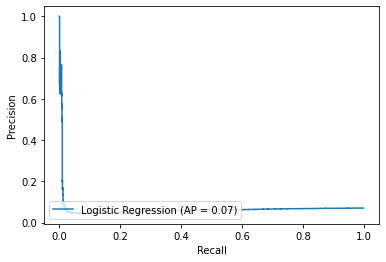

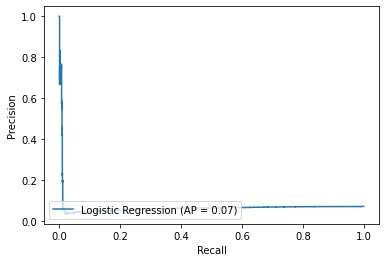

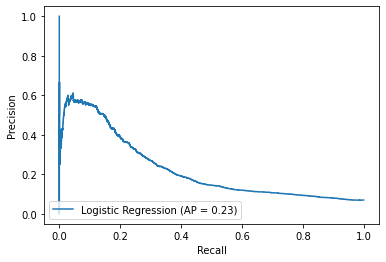

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
print("**********balance***************")
plot_precision_recall_curve(model_withoutweight, X_test, y_test, name = 'Logistic Regression')
print("**********unbalance***************")
plot_precision_recall_curve(model_withweight, X_test, y_test, name = 'Logistic Regression')
print("**********no woe***************")
plot_precision_recall_curve(model_not_woe, X_no_woe_test, y_no_woe_test, name = 'Logistic Regression')

In [ ]:
# YOUR CODE HERE
print("**********balance***************")
accuracy_score(y_test, y_pred_balanced)
print(classification_report(y_test, y_pred_balanced))
print("**********unbalance***************")
accuracy_score(y_test, y_pred_unbalanced)
print(classification_report(y_test, y_pred_unbalanced))
print("**********no woe***************")
accuracy_score(y_no_woe_test, y_pred_no_woe)
print(classification_report(y_no_woe_test, y_pred_no_woe))

**********balance***************
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     27958
           1       0.60      0.11      0.18      2110

    accuracy                           0.93     30068
   macro avg       0.77      0.55      0.57     30068
weighted avg       0.91      0.93      0.91     30068

**********unbalance***************
              precision    recall  f1-score   support

           0       0.98      0.57      0.72     27958
           1       0.13      0.87      0.23      2110

    accuracy                           0.59     30068
   macro avg       0.56      0.72      0.48     30068
weighted avg       0.92      0.59      0.69     30068

**********no woe***************
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     27958
           1       0.57      0.05      0.09      2110

    accuracy                           0.93     30068
   macro avg       0.75     

#### Confusion matrix

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations

# **Performance of the model with weightage and without weightage**
##  Please visit above Performance Metrics

* **Precision**
*  *Balance* 0.9946348093568925
*  *Unbalance* 0.5715001073038128
*  *No woe* 0.997210100865584


* **Recall**
*  *Balance* 0.9364539484761745
*  *Unbalance* 0.9827172642843963
*  *No woe* 0.9328158458244111



# **Have you tried implementing Logistic regression with normal features instead of WOE ?**
##    Yes, it is presented in the above.